In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/SalesJan2009.csv")
df.head()

,Transaction_date,Product,Price,Payment_Type,Name,City,State,Country,Account_Created,Last_Login,Latitude,Longitude
0,1/2/09 6:17,Product1,1200,Mastercard,carolina,Basildon,England,United Kingdom,1/2/09 6:00,1/2/09 6:08,51.500000,-1.116667
1,1/2/09 4:53,Product1,1200,Visa,Betina,Parkville,MO,United States,1/2/09 4:42,1/2/09 7:49,39.195000,-94.681940
2,1/2/09 13:08,Product1,1200,Mastercard,Federica e Andrea,Astoria,OR,United States,1/1/09 16:21,1/3/09 12:32,46.188060,-123.830000
3,1/3/09 14:44,Product1,1200,Visa,Gouya,Echuca,Victoria,Australia,9/25/05 21:13,1/3/09 14:22,-36.133333,144.750000
4,1/4/09 12:56,Product2,3600,Visa,Gerd W,Cahaba Heights,AL,United States,11/15/08 15:47,1/4/09 12:45,33.520560,-86.802500


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  998 non-null    object 
 1   Product           998 non-null    object 
 2   Price             998 non-null    object 
 3   Payment_Type      998 non-null    object 
 4   Name              998 non-null    object 
 5   City              998 non-null    object 
 6   State             997 non-null    object 
 7   Country           998 non-null    object 
 8   Account_Created   998 non-null    object 
 9   Last_Login        998 non-null    object 
 10  Latitude          998 non-null    float64
 11  Longitude         998 non-null    float64
dtypes: float64(2), object(10)
memory usage: 93.7+ KB


In [5]:
df['Payment_Type'].describe()

count      998
unique       4
top       Visa
freq       522
Name: Payment_Type, dtype: object

In [7]:
df['Payment_Type'].unique()

array(['Mastercard', 'Visa', 'Diners', 'Amex'], dtype=object)

Text(0.5, 1.0, 'Frecuencia de Métodos de Pago')

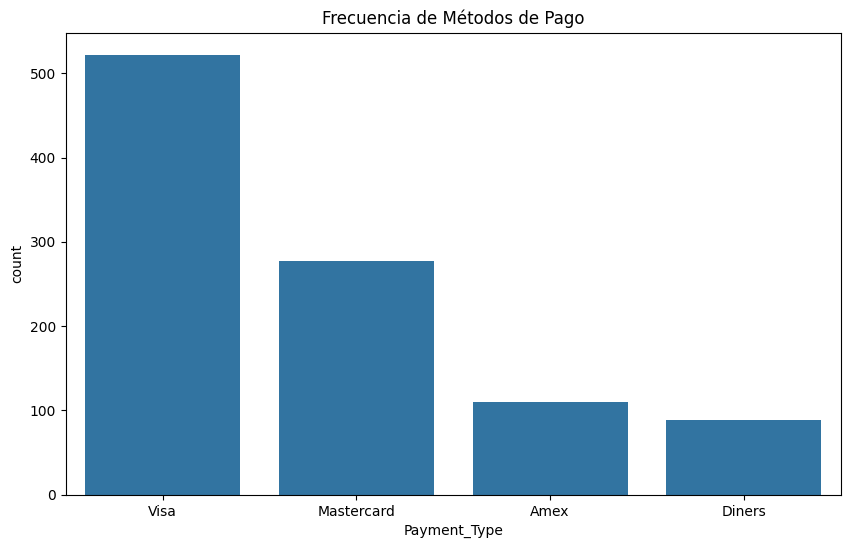

In [ ]:
# generar gráfica de frecuencia acumulativa
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Payment_Type', order=df['Payment_Type'].value_counts().index)
plt.title('Frecuencia de Métodos de Pago')

In [41]:
df['Transaction_date'] = pd.to_datetime(df['Transaction_date'], infer_datetime_format=True, errors='coerce')
df = df.dropna(subset=['Transaction_date'])

# agrupar por día y tipo de pago, luego acumulado
df['date'] = df['Transaction_date'].dt.normalize()
daily = df.groupby(['date', 'Payment_Type']).size().unstack(fill_value=0).sort_index()
cumulative = daily.cumsum()

C:\Users\guisa\AppData\Local\Temp\ipykernel_1360\3221575831.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Transaction_date'] = pd.to_datetime(df['Transaction_date'], infer_datetime_format=True, errors='coerce')


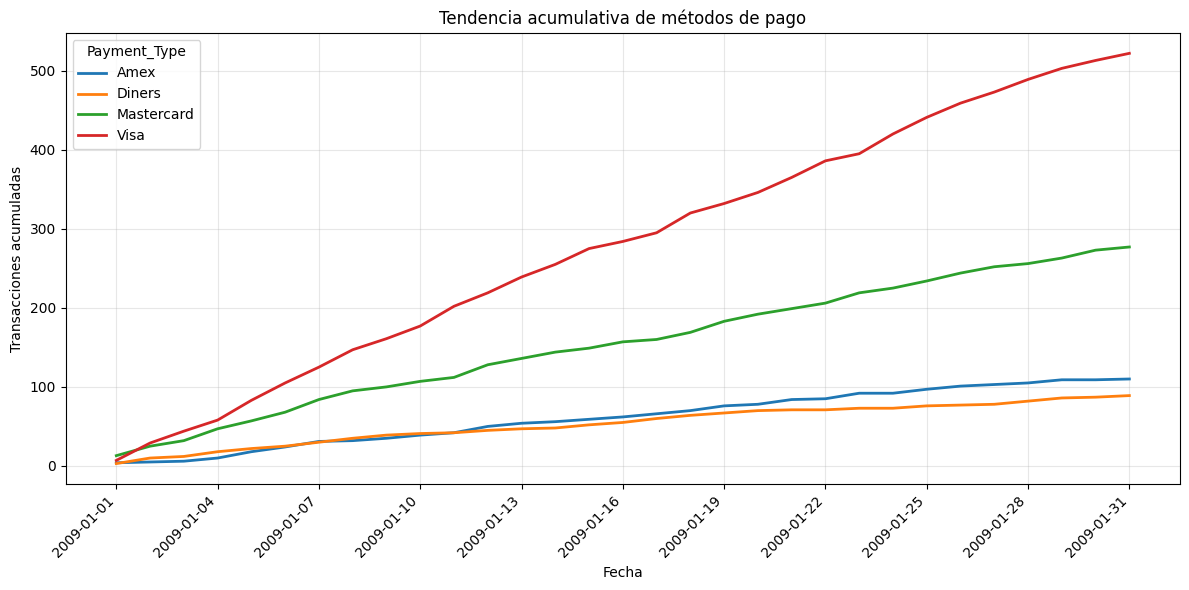

In [ ]:
plt.figure(figsize=(12, 6))
for col in cumulative.columns:
    plt.plot(cumulative.index, cumulative[col], linewidth=2, label=col)


n = len(cumulative)
step = max(1, n // 8)
xticks = cumulative.index[::step]
xtick_labels = [d.strftime('%Y-%m-%d') for d in xticks]

plt.title('Tendencia acumulativa de métodos de pago')
plt.xlabel('Fecha')
plt.ylabel('Transacciones acumuladas')
plt.xticks(xticks, xtick_labels, rotation=45, ha='right')
plt.legend(title='Payment_Type')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

> El método de pago que más transacciones se ha tenido a lo largo del tiempo, validado tanto por el gráfico acumulativo a través del tiempo como por el de frecuencias corresponde a VISA.